In [1]:
user_data = sc.textFile("/dick/TestMaterial/ml-100k/u.user")

In [2]:
user_data.first()

u'1|24|M|technician|85711'

In [17]:
type(user_data)

pyspark.rdd.RDD

In [3]:
user_fields = user_data.map(lambda line: line.split("|"))
num_users = user_fields.map(lambda fields: fields[0]).count()
num_genders = user_fields.map(lambda fields:fields[2]).distinct().count()
num_occupations = user_fields.map(lambda fields:fields[3]).distinct().count()
num_zipcodes = user_fields.map(lambda fields:fields[4]).distinct().count()
print "Users: %d, genders: %d, occupations: %d, ZIP codes: %d" % (num_users, num_genders,num_occupations, num_zipcodes)

Users: 943, genders: 2, occupations: 21, ZIP codes: 795


In [18]:
type(user_fields)
ages = user_fields.map(lambda x: int(x[1])).collect()
ages[0:10]

[24, 53, 23, 24, 33, 42, 57, 36, 29, 53]

In [19]:
type(user_fields)

pyspark.rdd.PipelinedRDD

In [24]:
user_fields.map(lambda x: int(x[1])).map(lambda x:x/10).reduce(lambda x,y:x+y)

2795

Populating the interactive namespace from numpy and matplotlib


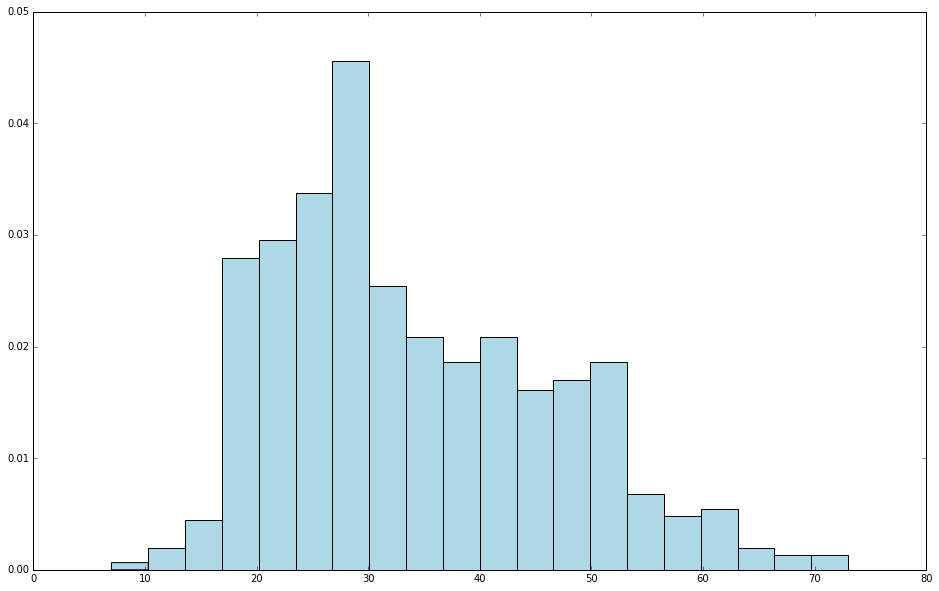

In [15]:
%pylab inline
hist(ages, bins=20, color='lightblue', normed=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)

In [2]:
records = sc.textFile("/home/dick/machinelearn/data/C06/1.txt")

In [18]:
records.map(lambda r: float(r[-1])).collect()[1:9]

[4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 0.0, 1.0]

In [19]:
records.collect()[1:9]

[u'25,3 4',
 u'32,4 5',
 u'39,5 6',
 u'46,6 7',
 u'53,7 8',
 u'60,8 9',
 u'67,9 10',
 u'74,10 11']

Populating the interactive namespace from numpy and matplotlib


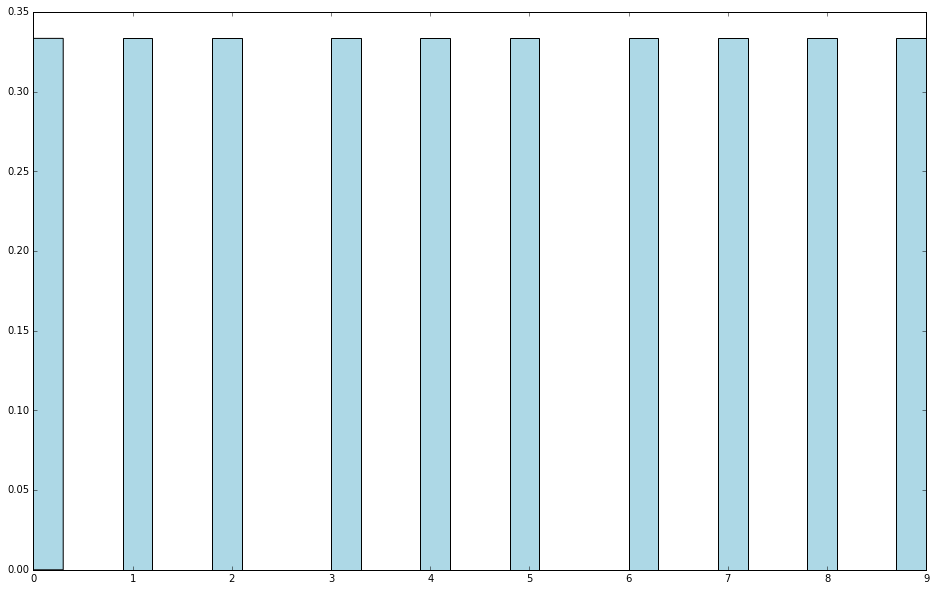

In [39]:
%pylab inline
targets = records.map(lambda r: float(r[-1])).collect()
targets[:10]
hist(targets, bins=30, color='lightblue', normed=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)

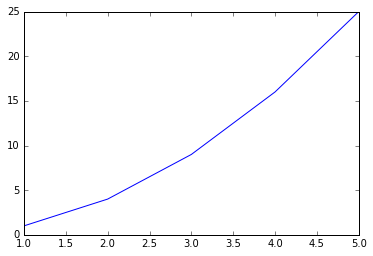

In [25]:
import numpy as np
import pylab as pl
x = [1, 2, 3, 4, 5]# Make an array of x values
y = [1, 4, 9, 16, 25]# Make an array of y values for each x value
pl.plot(x, y)# use pylab to plot x and y
pl.show()# show the plot on the screen

[3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 0.0, 1.0, 2.0]
[1.0, 2.0, 3.0, 3.0, 4.0, 5.0, 6.0, 6.0, 7.0, 8.0]


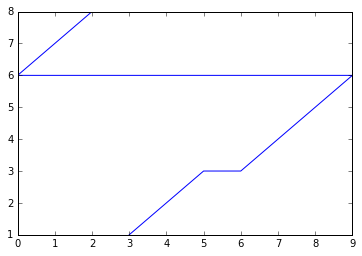

In [35]:
import numpy as np
import pylab as pl
x=records.map(lambda r: float(r[-1])).collect()[0:10]
y=records.map(lambda r: float(r[0])).collect()[0:10]
print x
print y
pl.plot(x, y)# use pylab to plot x and y
pl.show()# show the plot on the screen